In [0]:
!pip install googledrivedownloader
!pip install simpledbf
!pip install geopandas



     |████████████████████████████████| 901kB 2.8MB/s 
     |████████████████████████████████| 11.2MB 20.2MB/s 
     |████████████████████████████████| 17.9MB 30.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
import pandas as pd
from google_drive_downloader import GoogleDriveDownloader as gdd
from simpledbf import Dbf5
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [0]:
gdd.download_file_from_google_drive(file_id='1THOK61fWZpszf1tbNrcnBtTGL7QVeme4',
                                    dest_path='./data/1.zip',
                                    unzip=True)

Unzipping...Done.


In [0]:
!rm ./data/1.zip

In [0]:
dbf0 = Dbf5('./data/Intersec Seg_14.dbf')
dbf1 = Dbf5('./data/Intersec Seg_15.dbf')

In [0]:
df0 = dbf0.to_dataframe()
df1 = dbf1.to_dataframe()

In [0]:
print(df0)

      FID_ROBOPE  FECHA_DENU  ...     Lat_y     Long_x
0           7844  2014-12-29  ... -0.406807 -78.501287
1           3840  2014-07-01  ... -0.382786 -78.507353
2           1225  2014-02-24  ... -0.382786 -78.507353
3           6771  2014-11-14  ... -0.382786 -78.507353
4           7637  2014-12-19  ... -0.382786 -78.507353
5           7642  2014-12-20  ... -0.382786 -78.507353
6           7649  2014-12-20  ... -0.382786 -78.507353
7           7735  2014-12-24  ... -0.382786 -78.507353
8           1389  2014-03-06  ... -0.379236 -78.499077
9           2111  2014-04-08  ... -0.379236 -78.499077
10          3045  2014-05-26  ... -0.376291 -78.506284
11          7565  2014-12-17  ... -0.376291 -78.506284
12          4921  2014-08-20  ... -0.376291 -78.506284
13          2940  2014-05-20  ... -0.376291 -78.506284
14          2418  2014-04-25  ... -0.376291 -78.506284
15          4232  2014-07-18  ... -0.374565 -78.499518
16          3806  2014-06-30  ... -0.373001 -78.492943
17        

In [0]:
print(df1)

      FID_ROBOPE  FECHA_DENU  ...     Lat_y     Long_x
0           1089  2015-02-25  ... -0.400815 -78.472150
1            933  2015-02-17  ... -0.379236 -78.499077
2           1281  2015-03-06  ... -0.377219 -78.480028
3           1238  2015-03-04  ... -0.376291 -78.506284
4           2650  2015-05-08  ... -0.376291 -78.506284
5           1956  2015-04-06  ... -0.373001 -78.492943
6              0  2015-03-21  ... -0.376235 -78.472833
7           3521  2015-06-27  ... -0.351064 -78.552821
8           2301  2015-04-21  ... -0.347878 -78.558498
9            741  2015-02-04  ... -0.347210 -78.482731
10          1820  2015-03-27  ... -0.347210 -78.482731
11           922  2015-02-15  ... -0.344040 -78.565172
12          1417  2015-03-11  ... -0.341801 -78.480299
13          3172  2015-06-08  ... -0.341801 -78.480299
14          2641  2015-05-08  ... -0.339873 -78.584424
15          1964  2015-04-06  ... -0.335309 -78.547466
16          1700  2015-03-23  ... -0.336610 -78.552588
17        

In [0]:
result = pd.concat([df0, df1], axis=0)

In [0]:
print(result)

      FID_ROBOPE  FECHA_DENU  ...     Lat_y     Long_x
0           7844  2014-12-29  ... -0.406807 -78.501287
1           3840  2014-07-01  ... -0.382786 -78.507353
2           1225  2014-02-24  ... -0.382786 -78.507353
3           6771  2014-11-14  ... -0.382786 -78.507353
4           7637  2014-12-19  ... -0.382786 -78.507353
5           7642  2014-12-20  ... -0.382786 -78.507353
6           7649  2014-12-20  ... -0.382786 -78.507353
7           7735  2014-12-24  ... -0.382786 -78.507353
8           1389  2014-03-06  ... -0.379236 -78.499077
9           2111  2014-04-08  ... -0.379236 -78.499077
10          3045  2014-05-26  ... -0.376291 -78.506284
11          7565  2014-12-17  ... -0.376291 -78.506284
12          4921  2014-08-20  ... -0.376291 -78.506284
13          2940  2014-05-20  ... -0.376291 -78.506284
14          2418  2014-04-25  ... -0.376291 -78.506284
15          4232  2014-07-18  ... -0.374565 -78.499518
16          3806  2014-06-30  ... -0.373001 -78.492943
17        

In [0]:
result = result.drop(columns=['FECHA_DEL_','TipoDeRobo', 'FECHA_DENU', 'FID_ROBOPE',  'DIRECCION_', 
                              'Horario',  'TIPO_DE_AG', 'Masculino', 'Femenino', 'Administra', 'Barrio', 
                              'Parroquia', 'Urbana_Rur', 'Lugar','FID_Barrio', 'NOMBRE', 'BARRIO_ID', 'X', 'Y'])

In [0]:
print(result)

                   Modus     Lat_y     Long_x
0              HALADORES -0.406807 -78.501287
1           ASALTO COMÚN -0.382786 -78.507353
2           ASALTO COMÚN -0.382786 -78.507353
3     SUSTANCIAS EST.PSI -0.382786 -78.507353
4               SIN DATO -0.382786 -78.507353
5               SIN DATO -0.382786 -78.507353
6               SIN DATO -0.382786 -78.507353
7               SIN DATO -0.382786 -78.507353
8            CARTERISTAS -0.379236 -78.499077
9              HALADORES -0.379236 -78.499077
10          ASALTO COMÚN -0.376291 -78.506284
11              SIN DATO -0.376291 -78.506284
12             HALADORES -0.376291 -78.506284
13          ASALTO COMÚN -0.376291 -78.506284
14          ASALTO COMÚN -0.376291 -78.506284
15          ASALTO COMÚN -0.374565 -78.499518
16          ASALTO COMÚN -0.373001 -78.492943
17          ASALTO COMÚN -0.372385 -78.498927
18          ASALTO COMÚN -0.370406 -78.475886
19          ASALTO COMÚN -0.351064 -78.552821
20              SIN DATO -0.352565

In [0]:
result = result[result['Modus'] != 'SIN DATO']
result = result.replace({'HALADORES':1, 'ASALTO COMÚN':2, 'SUSTANCIAS EST.PSI':3,
                        'CARTERISTAS':4, 'LANZAS':5, 'ESTRUCHANTES':6, 'ROBO EXPRESS':7,
                        'SACA PINTAS':8, 'ARRANCHADORES':9, 'OTROS':10, 'ROTURA DE VIDRIOS':11, 'DULCES SUEÑOS':12})

In [0]:
print(result)

      Modus     Lat_y     Long_x
0         1 -0.406807 -78.501287
1         2 -0.382786 -78.507353
2         2 -0.382786 -78.507353
3         3 -0.382786 -78.507353
8         4 -0.379236 -78.499077
9         1 -0.379236 -78.499077
10        2 -0.376291 -78.506284
12        1 -0.376291 -78.506284
13        2 -0.376291 -78.506284
14        2 -0.376291 -78.506284
15        2 -0.374565 -78.499518
16        2 -0.373001 -78.492943
17        2 -0.372385 -78.498927
18        2 -0.370406 -78.475886
19        2 -0.351064 -78.552821
21        2 -0.351064 -78.552821
22        2 -0.351064 -78.552821
23        2 -0.351064 -78.552821
25        2 -0.351064 -78.552821
26        3 -0.351064 -78.552821
27        2 -0.351064 -78.552821
28        2 -0.351064 -78.552821
29        2 -0.351064 -78.552821
30        2 -0.344795 -78.489593
31        3 -0.344795 -78.489593
32        2 -0.344565 -78.468945
33        3 -0.343791 -78.540741
34        2 -0.342428 -78.557922
35        2 -0.343596 -78.545733
36        

In [0]:
coords = result.as_matrix(columns=['Lat_y','Long_x'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
print(coords)

[[-4.06807485e-01 -7.85012869e+01]
 [-3.82785571e-01 -7.85073526e+01]
 [-3.82785571e-01 -7.85073526e+01]
 ...
 [ 6.22061220e-02 -7.86816904e+01]
 [ 1.34497167e-01 -7.83708306e+01]
 [ 1.43781282e-01 -7.87668945e+01]]


In [0]:
kms_per_radian = 15371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 268


In [0]:
clusters.to_json(r'closters.json')
print(clusters)

0                    [[-0.406807485395, -78.5012868512]]
1      [[-0.382785571337, -78.5073525778], [-0.382785...
2      [[-0.379235633437, -78.4990769958], [-0.379235...
3      [[-0.376290657033, -78.50628365], [-0.37629065...
4                    [[-0.373000959654, -78.4929430117]]
5                    [[-0.370405658914, -78.4758856523]]
6      [[-0.351064414037, -78.5528212146], [-0.351064...
7      [[-0.344795329408, -78.4895931773], [-0.344795...
8                      [[-0.344564865611, -78.46894502]]
9      [[-0.343790910079, -78.5407414384], [-0.343596...
10     [[-0.342428110721, -78.5579221096], [-0.342428...
11     [[-0.341800696968, -78.4802989516], [-0.341800...
12     [[-0.339872556393, -78.5844235362], [-0.339872...
13     [[-0.336609854054, -78.5525876773], [-0.336609...
14                   [[-0.338386406098, -78.4965472532]]
15     [[-0.336871455567, -78.5676380535], [-0.334677...
16     [[-0.328007687935, -78.5518177594], [-0.328007...
17     [[-0.330307321431, -78.5

In [0]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [0]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'Long_x':lons, 'Lat_y':lats})


In [0]:
print(rep_points)

        Long_x     Lat_y
0   -78.501287 -0.406807
1   -78.507353 -0.382786
2   -78.499077 -0.379236
3   -78.506284 -0.376291
4   -78.492943 -0.373001
5   -78.475886 -0.370406
6   -78.552821 -0.351064
7   -78.489593 -0.344795
8   -78.468945 -0.344565
9   -78.540741 -0.343791
10  -78.557922 -0.342428
11  -78.480299 -0.341801
12  -78.584424 -0.339873
13  -78.552588 -0.336610
14  -78.496547 -0.338386
15  -78.572764 -0.332024
16  -78.551818 -0.328008
17  -78.534594 -0.330307
18  -78.482474 -0.328761
19  -78.543908 -0.323024
20  -78.529190 -0.323407
21  -78.553151 -0.321434
22  -78.472796 -0.325702
23  -78.560253 -0.317952
24  -78.536307 -0.316284
25  -78.477685 -0.314337
26  -78.541528 -0.308742
27  -78.524634 -0.312065
28  -78.562245 -0.308651
29  -78.518100 -0.310680
..         ...       ...
238 -78.424603 -0.169896
239 -78.434748 -0.167294
240 -78.318652 -0.160017
241 -78.324951 -0.156695
242 -78.309930 -0.163964
243 -78.431153 -0.141845
244 -78.421849 -0.137257
245 -78.415575 -0.135357


In [0]:
rs = rep_points.apply(lambda row: result[(result['Lat_y']==row['Lat_y'])].iloc[0], axis=1)

In [0]:
print(result.groupby('Lat_y').size())

Lat_y
-0.406807     1
-0.382786     3
-0.379236     3
-0.377219     1
-0.376291     6
-0.376235     1
-0.374565     1
-0.373001     1
-0.372385     1
-0.370406     1
-0.351064     9
-0.347878     1
-0.347210     1
-0.344795     2
-0.344565     1
-0.343791     1
-0.343596     1
-0.342428     2
-0.341801     3
-0.339873     2
-0.338597     5
-0.338386     1
-0.336871     1
-0.336610    14
-0.335309     2
-0.335028     3
-0.334677     3
-0.332024     2
-0.331865     1
-0.331220     1
             ..
-0.050763     1
-0.047445     1
-0.046987     1
-0.045103     1
-0.042487     1
-0.038743     2
-0.030672     5
-0.027697     1
-0.023233     1
-0.016896     1
-0.011073     9
-0.008684     1
-0.007894     1
-0.004891     7
-0.003136     7
-0.001838     2
-0.000424    10
 0.000151     1
 0.000422     1
 0.001093     3
 0.007379     2
 0.009270     3
 0.012513     2
 0.013020     1
 0.013867     1
 0.014558     3
 0.025231     1
 0.062206     2
 0.134497     1
 0.143781     1
Length: 652, dtype

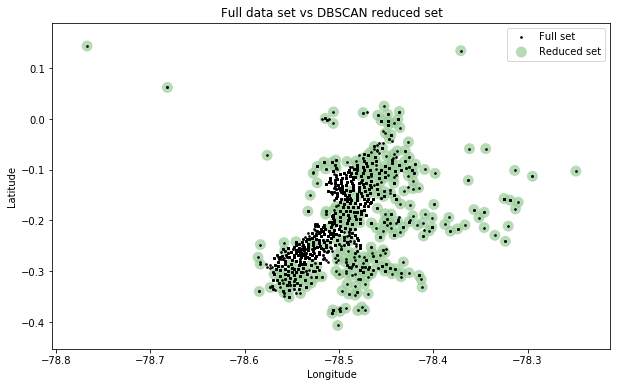

In [0]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['Long_x'], rs['Lat_y'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(result['Long_x'], result['Lat_y'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [0]:
df = pd.DataFrame(rs, columns=['Lat_y', 'Long_x'])
print(df)

        Lat_y     Long_x
0   -0.406807 -78.501287
1   -0.382786 -78.507353
2   -0.379236 -78.499077
3   -0.376291 -78.506284
4   -0.373001 -78.492943
5   -0.370406 -78.475886
6   -0.351064 -78.552821
7   -0.344795 -78.489593
8   -0.344565 -78.468945
9   -0.343791 -78.540741
10  -0.342428 -78.557922
11  -0.341801 -78.480299
12  -0.339873 -78.584424
13  -0.336610 -78.552588
14  -0.338386 -78.496547
15  -0.332024 -78.572764
16  -0.328008 -78.551818
17  -0.330307 -78.534594
18  -0.328761 -78.482474
19  -0.323024 -78.543908
20  -0.323407 -78.529190
21  -0.321434 -78.553151
22  -0.325702 -78.472796
23  -0.317952 -78.560253
24  -0.316284 -78.536307
25  -0.314337 -78.477685
26  -0.308742 -78.541528
27  -0.312065 -78.524634
28  -0.308651 -78.562245
29  -0.310680 -78.518100
..        ...        ...
238 -0.169896 -78.424603
239 -0.167294 -78.434748
240 -0.160017 -78.318652
241 -0.156695 -78.324951
242 -0.163964 -78.309930
243 -0.141845 -78.431153
244 -0.137257 -78.421849
245 -0.135357 -78.415575


In [0]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['Long_x'], df['Lat_y'])]
df = df.drop(['Long_x', 'Lat_y'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(df, crs=crs, geometry=geometry)


print(gdf)

                                        geometry
0     POINT (-78.50128685120001 -0.406807485395)
1     POINT (-78.50735257780001 -0.382785571337)
2         POINT (-78.4990769958 -0.379235633437)
3           POINT (-78.50628365 -0.376290657033)
4     POINT (-78.49294301170001 -0.373000959654)
5     POINT (-78.47588565229999 -0.370405658914)
6         POINT (-78.5528212146 -0.351064414037)
7     POINT (-78.48959317729999 -0.344795329408)
8     POINT (-78.46894502000001 -0.344564865611)
9         POINT (-78.5407414384 -0.343790910079)
10        POINT (-78.5579221096 -0.342428110721)
11    POINT (-78.48029895160001 -0.341800696968)
12    POINT (-78.58442353620001 -0.339872556393)
13        POINT (-78.5525876773 -0.336609854054)
14    POINT (-78.49654725320001 -0.338386406098)
15        POINT (-78.5727643876 -0.332024042438)
16        POINT (-78.5518177594 -0.328007687935)
17        POINT (-78.5345942851 -0.330307321431)
18        POINT (-78.4824741022 -0.328760867235)
19    POINT (-78.543

In [0]:
gdf = gdf.drop(['Lat_y', 'Long_x'], axis=1)

KeyError: ignored

In [0]:
gdf.to_json(r'1.json')
print(gdf)

ValueError: ignored

In [0]:
dfr = gdf

In [0]:
dfr = dfr.insert(1, "type", "Feature")

ValueError: ignored

In [0]:
print(dfr)

                                        geometry     type
0     POINT (-78.50128685120001 -0.406807485395)  Feature
1     POINT (-78.50735257780001 -0.382785571337)  Feature
2         POINT (-78.4990769958 -0.379235633437)  Feature
3           POINT (-78.50628365 -0.376290657033)  Feature
4     POINT (-78.49294301170001 -0.373000959654)  Feature
5     POINT (-78.47588565229999 -0.370405658914)  Feature
6         POINT (-78.5528212146 -0.351064414037)  Feature
7     POINT (-78.48959317729999 -0.344795329408)  Feature
8     POINT (-78.46894502000001 -0.344564865611)  Feature
9         POINT (-78.5407414384 -0.343790910079)  Feature
10        POINT (-78.5579221096 -0.342428110721)  Feature
11    POINT (-78.48029895160001 -0.341800696968)  Feature
12    POINT (-78.58442353620001 -0.339872556393)  Feature
13        POINT (-78.5525876773 -0.336609854054)  Feature
14    POINT (-78.49654725320001 -0.338386406098)  Feature
15        POINT (-78.5727643876 -0.332024042438)  Feature
16        POIN

In [0]:
print(dfr)

                                        geometry     type
0     POINT (-78.50128685120001 -0.406807485395)  Feature
1     POINT (-78.50735257780001 -0.382785571337)  Feature
2         POINT (-78.4990769958 -0.379235633437)  Feature
3           POINT (-78.50628365 -0.376290657033)  Feature
4     POINT (-78.49294301170001 -0.373000959654)  Feature
5     POINT (-78.47588565229999 -0.370405658914)  Feature
6         POINT (-78.5528212146 -0.351064414037)  Feature
7     POINT (-78.48959317729999 -0.344795329408)  Feature
8     POINT (-78.46894502000001 -0.344564865611)  Feature
9         POINT (-78.5407414384 -0.343790910079)  Feature
10        POINT (-78.5579221096 -0.342428110721)  Feature
11    POINT (-78.48029895160001 -0.341800696968)  Feature
12    POINT (-78.58442353620001 -0.339872556393)  Feature
13        POINT (-78.5525876773 -0.336609854054)  Feature
14    POINT (-78.49654725320001 -0.338386406098)  Feature
15        POINT (-78.5727643876 -0.332024042438)  Feature
16        POIN